In [1]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import my_parser

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = my_parser.get_all()

In [5]:
label_map = {'Reject': 0, 'Accept': 1}
binary_labels = [label_map[item['label']['label']] for item in data]

print(binary_labels)

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 

(array([4992.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

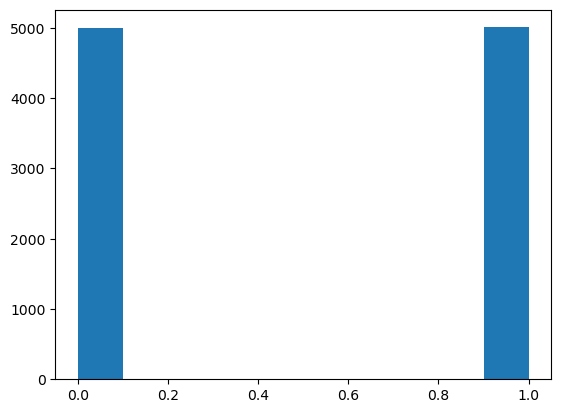

In [6]:
plt.hist(binary_labels)

In [8]:
data[0]['passport']['first_name'] == data[0]['account_form']['first_name']

True

In [12]:
label_map = {'Reject': 0, 'Accept': 1}

# Define fields to check across sources (without '.json')
fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

# Track stats for each field
field_stats = {field: {'match': 0, 'total': 0} for field in fields_to_check}

# Loop through entries
for entry in data:
    if label_map.get(entry.get('label', {}).get('label')) != 1:
        continue  # Skip if not 'Accept'

    for field, sources in fields_to_check.items():
        values = []
        for src in sources:
            val = entry.get(src, {}).get(field)
            values.append(val)

        # Count only if we have at least 2 non-None values to compare
        non_none_values = [v for v in values if v is not None]
        if len(non_none_values) >= 2:
            if all(v == non_none_values[0] for v in non_none_values):
                field_stats[field]['match'] += 1
            field_stats[field]['total'] += 1

# Print the result
print("📊 Consistency report for 'Accept' entries:\n")
for field, stat in field_stats.items():
    total = stat['total']
    match = stat['match']
    if total > 0:
        percent = 100 * match / total
        print(f"✅ {field:20}: {percent:.2f}% consistent ({match}/{total})")
    else:
        print(f"⚠️  {field:20}: No valid comparisons")


📊 Consistency report for 'Accept' entries:

✅ first_name          : 100.00% consistent (5008/5008)
✅ middle_name         : 100.00% consistent (5008/5008)
✅ last_name           : 100.00% consistent (5008/5008)
✅ passport_number     : 100.00% consistent (5008/5008)
✅ birth_date          : 100.00% consistent (5008/5008)
✅ gender              : 100.00% consistent (5008/5008)
✅ nationality         : 100.00% consistent (5008/5008)
✅ passport_issue_date : 100.00% consistent (5008/5008)
✅ passport_expiry_date: 100.00% consistent (5008/5008)
✅ country_of_domicile : 100.00% consistent (5008/5008)
✅ email_address       : 100.00% consistent (5008/5008)
✅ phone_number        : 100.00% consistent (5008/5008)
✅ currency            : 100.00% consistent (5008/5008)
✅ address             : 100.00% consistent (5008/5008)
